In [29]:
import tensorflow as tf

# YOUR CODE SHOULD START HERE
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc') > .99):
            print('Reached 99% of Accuracy!')
            self.model.stop_training = True
  
# YOUR CODE SHOULD END HERE

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

# YOUR CODE SHOULD START HERE
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()
# YOUR CODE SHOULD END HERE

model = tf.keras.models.Sequential([
# YOUR CODE SHOULD START HERE
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(.10),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
# YOUR CODE SHOULD END HERE
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# YOUR CODE SHOULD START HERE
model.fit(x_train, y_train, epochs=10, #callbacks=[callbacks]
         )
# YOUR CODE SHOULD END HERE

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2098 - accuracy: 0.9374
Epoch 2/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0875 - accuracy: 0.9743
Epoch 3/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0604 - accuracy: 0.9812
Epoch 4/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0434 - accuracy: 0.9862
Epoch 5/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0344 - accuracy: 0.9886
Epoch 6/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0295 - accuracy: 0.9900
Epoch 7/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0242 - accuracy: 0.9917
Epoch 8/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0195 - accuracy: 0.9933
Epoch 9/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0186 - accuracy: 0.9935
Epoch 10/10
60

In [30]:
model.evaluate(x_test, y_test, verbose=2)

10000/1 - 0s - loss: 0.0369 - accuracy: 0.9824


[0.07353908004772784, 0.9824]

In [11]:
classifications = model.predict(x_test)

print(classifications[0])
print(y_test[0])

[4.1502383e-12 3.1947231e-12 5.6869548e-10 6.1956435e-08 5.4407995e-18
 8.7212279e-11 2.7796339e-16 9.9999988e-01 2.1807084e-11 3.4960232e-09]
7


In [ ]:
## Classification with Convolutions 

In [31]:
import tensorflow as tf

print(tf.__version__)

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0

test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

## Building the Model
model = tf.keras.models.Sequential([
    # Input layer
  tf.keras.layers.Conv2D(64, (3,3), activation='relu',
                         input_shape=(28, 28, 1)),
    
    # Hidden layer
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
    
    # Classifier
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
    
    # Output layer
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# summary the model
model.summary()

# Fiting on training set
model.fit(training_images, training_labels, epochs=10)



2.0.0
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 64)        16448     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               295040    
_________________________________________________________________
dense_31 (Dense)             (None, 10)        

In [32]:
test_loss = model.evaluate(test_images, test_labels, verbose=2)

10000/1 - 1s - loss: 0.0195 - accuracy: 0.9904


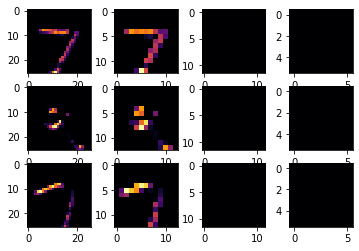

In [39]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26

CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.
                                         input, 
                                         outputs = layer_outputs)


for x in range(0,4):

    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER],
                      cmap='inferno')
    axarr[1,x].grid(False)
    
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], 
                      cmap='inferno')
    axarr[2,x].grid(False)

plt.show()